In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#### 1.Problem_Statement

In [ ]:
To predict Heart disease using following parameters:
    age: The person's age in years
1.sex: The person's sex (1 = male, 0 = female)
2.cp: chest pain type
    Value 0: asymptomatic
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: typical angina
3.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
4.chol: The person's cholesterol measurement in mg/dl
5.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
6.restecg: resting electrocardiographic results
    Value 0: showing probable or definite left ventricular 	hypertrophy by Estes' criteria
    Value 1: normal
    Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

7.thalach: The person's maximum heart rate achieved
8.exang: Exercise induced angina (1 = yes; 0 = no)
9.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
10.slope: the slope of the peak exercise ST segment (0: downsloping; 1: flat; 2: upsloping)
11.ca: The number of major vessels (0-3)
12.thal: Results of the blood flow observed via the radioactive dye.
 
    Value 1: fixed defect (no blood flow in some part of the heart)
    Value 2: normal blood flow
    Value 3: reversible defect (a blood flow is observed but it is not normal)
13.target : 0 = disease, 1 = no disease

#### 2.Data_Reading

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
x = df.drop("target",axis = True)
y = df['target']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20,stratify=y)

#### 3.Exploratory_Data_Analysis

#### 3.1.Data shape

In [16]:
x_train.shape

(242, 13)

In [17]:
x_test.shape

(61, 13)

In [18]:
y_train.shape

(242,)

In [19]:
y_test.shape

(61,)

#### 3.2.Data information

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 218 to 90
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [21]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 45 to 264
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        61 non-null     int64  
 12  thal      61 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 6.7 KB


In [22]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 242 entries, 218 to 90
Series name: target
Non-Null Count  Dtype
--------------  -----
242 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [23]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 242 entries, 218 to 90
Series name: target
Non-Null Count  Dtype
--------------  -----
242 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [ ]:
No column in dataset has object datatype

#### 3.3.Null_Values

In [25]:
x_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [26]:
x_test.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [30]:
y_train.isna().sum()

0

In [31]:
y_test.isna().sum()

0

In [ ]:
dataset has no missing value

#### 3.4.Statistical_Measure

In [32]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,242.0,54.380165,8.944046,29.0,47.25,56.0,60.0,77.0
sex,242.0,0.690083,0.463418,0.0,0.00,1.0,1.0,1.0
cp,242.0,0.946281,1.023179,0.0,0.00,1.0,2.0,3.0
trestbps,242.0,130.735537,16.856371,94.0,120.00,130.0,140.0,180.0
chol,242.0,244.628099,48.866001,131.0,209.00,240.0,273.0,417.0
fbs,242.0,0.140496,0.348221,0.0,0.00,0.0,0.0,1.0
restecg,242.0,0.541322,0.523659,0.0,0.00,1.0,1.0,2.0
thalach,242.0,148.780992,22.960492,71.0,133.25,152.0,163.0,202.0
exang,242.0,0.342975,0.475687,0.0,0.00,0.0,1.0,1.0
oldpeak,242.0,1.020661,1.169950,0.0,0.00,0.6,1.6,6.2


In [33]:
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,61.0,54.311475,9.687691,34.0,48.0,54.0,63.0,71.0
sex,61.0,0.655738,0.479070,0.0,0.0,1.0,1.0,1.0
cp,61.0,1.049180,1.071233,0.0,0.0,1.0,2.0,3.0
trestbps,61.0,135.147541,19.776110,108.0,120.0,130.0,145.0,200.0
chol,61.0,252.754098,62.263327,126.0,214.0,244.0,281.0,564.0
fbs,61.0,0.180328,0.387651,0.0,0.0,0.0,0.0,1.0
restecg,61.0,0.475410,0.535617,0.0,0.0,0.0,1.0,2.0
thalach,61.0,153.081967,22.542771,103.0,139.0,158.0,171.0,195.0
exang,61.0,0.262295,0.443533,0.0,0.0,0.0,1.0,1.0
oldpeak,61.0,1.114754,1.131494,0.0,0.1,0.8,1.8,4.0


In [34]:
y_train.describe().T

count    242.000000
mean       0.545455
std        0.498962
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [35]:
y_test.describe().T

count    61.000000
mean      0.540984
std       0.502453
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: target, dtype: float64

#### 3.5.Target_Variable

In [36]:
y_train.value_counts()

1    132
0    110
Name: target, dtype: int64

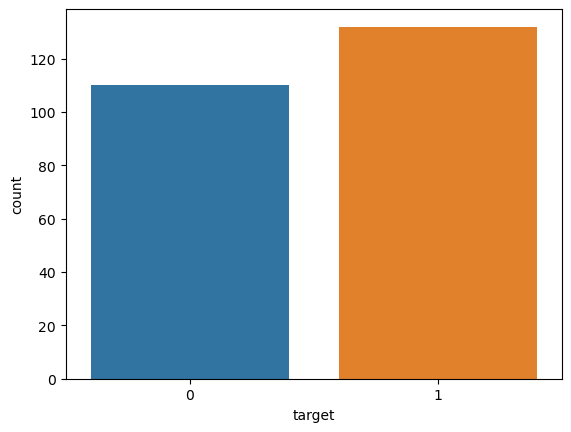

In [44]:
sns.countplot(x = y_train)
plt.savefig("y_train feature")

In [37]:
y_test.value_counts()

1    33
0    28
Name: target, dtype: int64

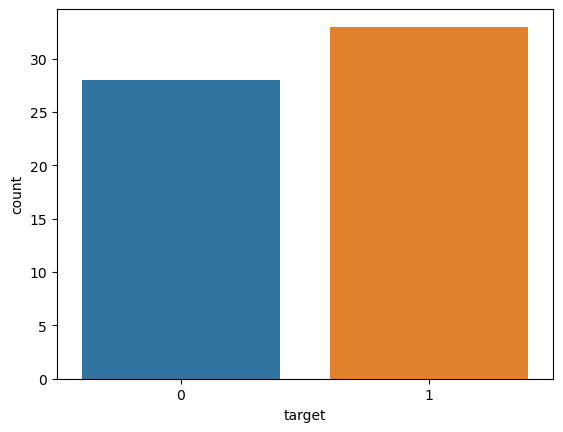

In [45]:
sns.countplot(x = y_test)
plt.savefig("y_test feature")

#### 3.6.Outliers

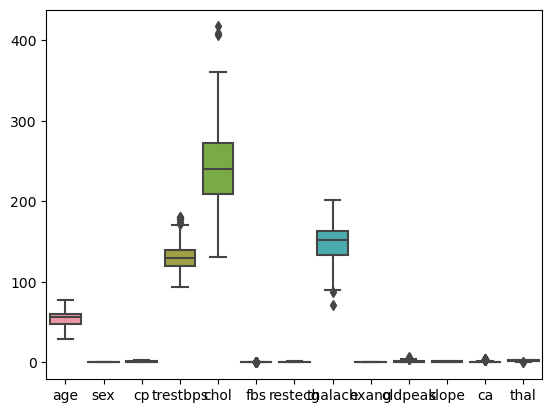

In [48]:
sns.boxplot(x_train)
plt.savefig("x_train_outliers")

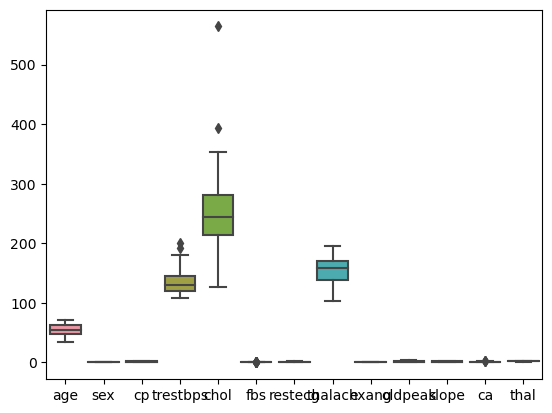

In [49]:
sns.boxplot(x_test)
plt.savefig("x_test_outliers")

#### 4.Feature_Engineering

#### 4.1.Handling ouliers

In [50]:
x_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

<Axes: >

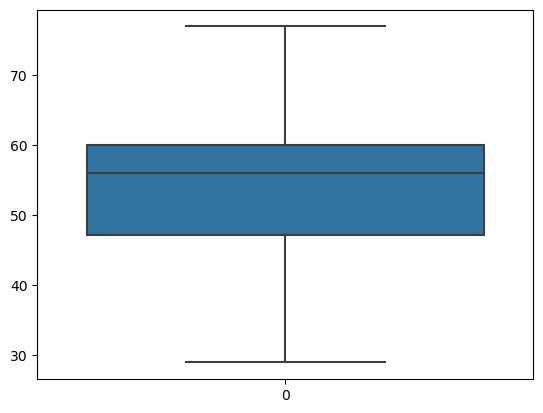

In [51]:
sns.boxplot(x_train["age"])

<Axes: >

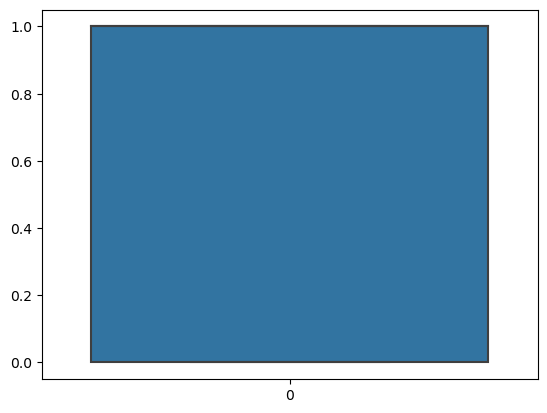

In [52]:
sns.boxplot(x_train["sex"])

<Axes: >

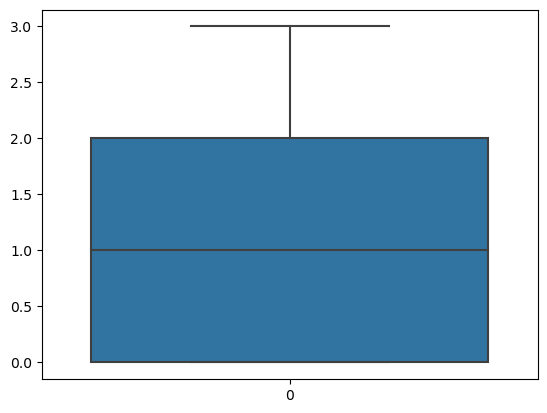

In [53]:
sns.boxplot(x_train["cp"])

<Axes: >

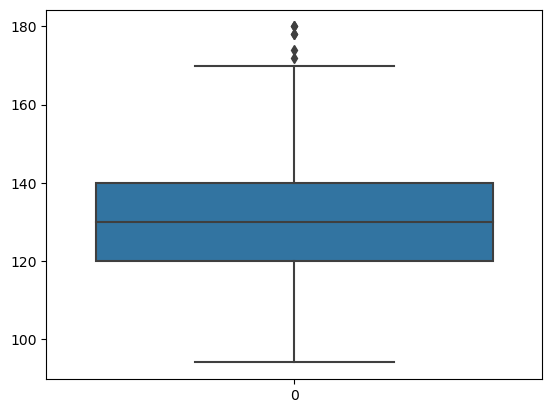

In [55]:
sns.boxplot(x_train["trestbps"])

<Axes: >

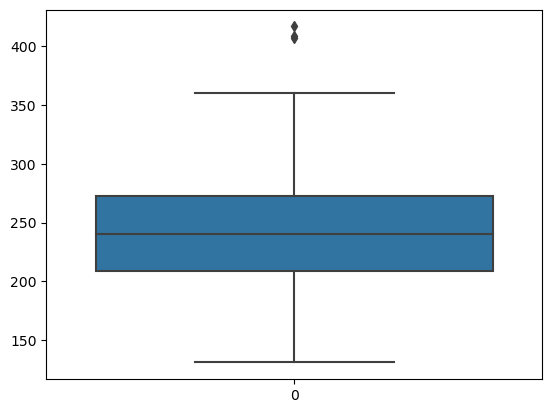

In [59]:
sns.boxplot(x_train["chol"])

<Axes: >

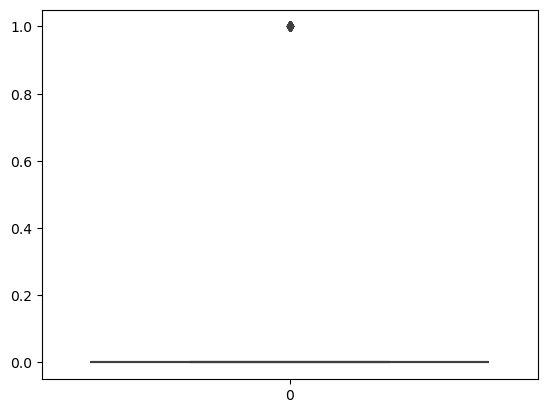

In [60]:
sns.boxplot(x_train["fbs"])

<Axes: >

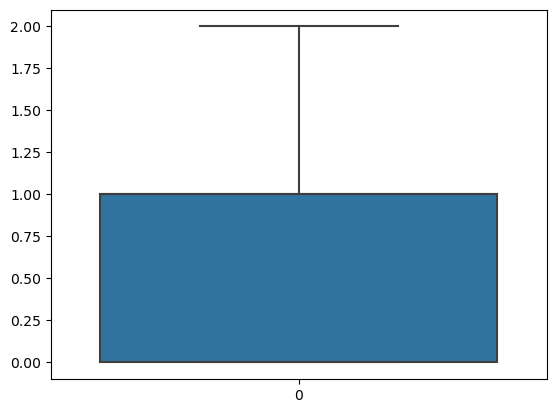

In [61]:
sns.boxplot(x_train["restecg"])

<Axes: >

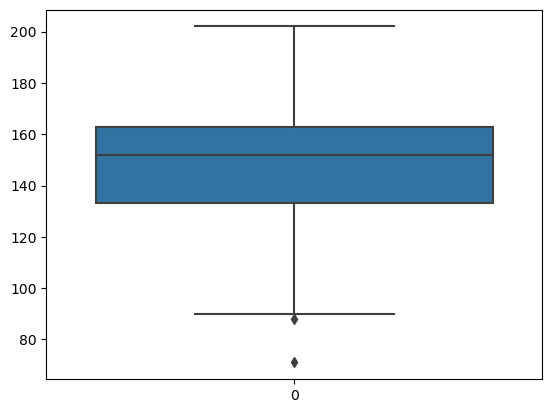

In [62]:
sns.boxplot(x_train["thalach"])

<Axes: >

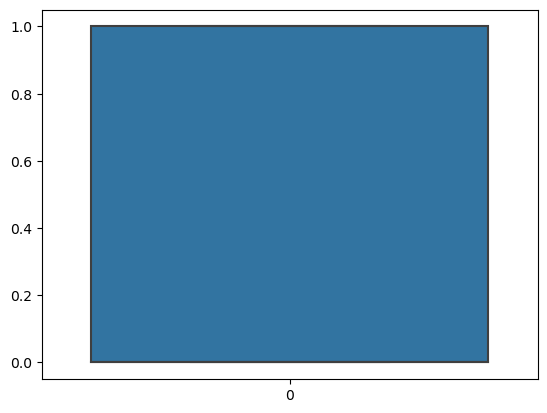

In [63]:
sns.boxplot(x_train["exang"])

<Axes: >

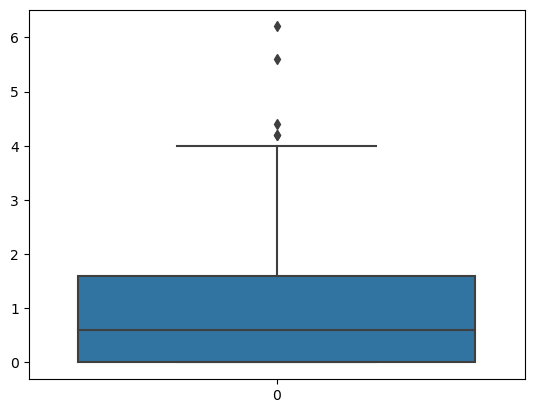

In [64]:
sns.boxplot(x_train["oldpeak"])

<Axes: >

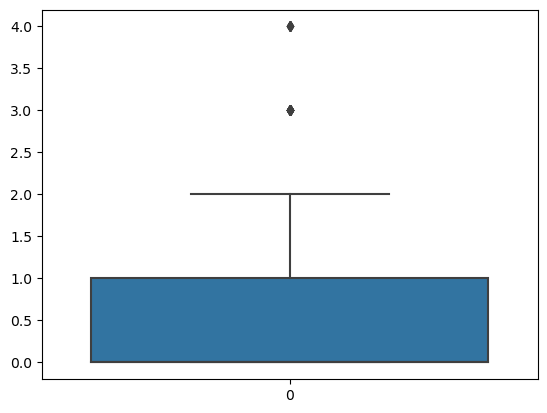

In [65]:
sns.boxplot(x_train["ca"])

<Axes: >

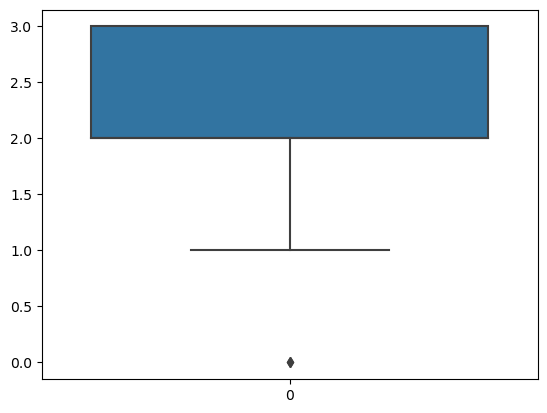

In [66]:
sns.boxplot(x_train["thal"])

In [67]:
from sklearn.preprocessing import PowerTransformer

In [74]:
pt = PowerTransformer(method='yeo-johnson')
data_x_train= pt.fit_transform(x_train)
data_x_train

array([[ 1.22145529,  0.67015058, -1.01046818, ..., -0.73880211,
         1.03996899,  1.19779495],
       [-1.63750914, -1.49220195,  1.0754553 , ...,  1.03642995,
        -0.83536525, -0.51430558],
       [ 0.60423277,  0.67015058, -1.01046818, ...,  1.03642995,
         1.2823664 ,  1.19779495],
       ...,
       [-1.54269616,  0.67015058,  1.43757839, ...,  1.03642995,
        -0.83536525,  1.19779495],
       [ 0.72528475,  0.67015058, -1.01046818, ..., -0.73880211,
         1.03996899, -0.51430558],
       [-0.74373138,  0.67015058,  1.0754553 , ...,  1.03642995,
         1.2823664 , -0.51430558]])

In [75]:
x_train = pd.DataFrame(data_x_train,columns = x_train.columns)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.221455,0.670151,-1.010468,0.330580,0.279411,-0.404304,-1.046975,-0.999784,-0.722504,1.346564,-0.738802,1.039969,1.197795
1,-1.637509,-1.492202,1.075455,-2.618155,-0.942679,-0.404304,0.899645,1.475376,-0.722504,-1.153690,1.036430,-0.835365,-0.514306
2,0.604233,0.670151,-1.010468,-0.802956,-0.221174,2.473388,0.899645,0.420928,1.384075,0.740414,1.036430,1.282366,1.197795
3,1.221455,-1.492202,1.075455,1.625160,2.077658,-0.404304,-1.046975,-0.016505,-0.722504,0.252552,1.036430,-0.835365,-0.514306
4,-0.316064,0.670151,1.075455,2.158882,-0.942679,2.473388,0.899645,0.523565,-0.722504,-0.116797,1.036430,-0.835365,1.197795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.018492,-1.492202,0.464226,0.155131,1.809253,-0.404304,0.899645,0.734738,-0.722504,0.603282,1.036430,-0.835365,-0.514306
238,1.348371,-1.492202,-1.010468,2.408318,-0.264993,2.473388,0.899645,0.681208,1.384075,0.443112,-0.738802,1.282366,1.197795
239,-1.542696,0.670151,1.437578,0.612459,-0.942679,-0.404304,0.899645,1.415447,1.384075,0.740414,1.036430,-0.835365,1.197795
240,0.725285,0.670151,-1.010468,0.501241,-1.831564,-0.404304,-1.046975,-1.071028,1.384075,1.550906,-0.738802,1.039969,-0.514306


<Axes: >

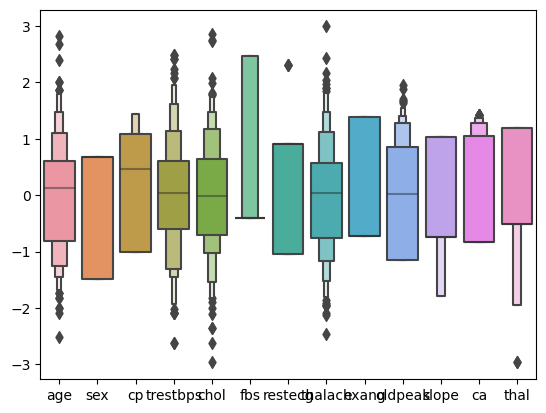

In [79]:
sns.boxenplot(x_train)

In [76]:
pt = PowerTransformer(method='yeo-johnson')
data_x_test= pt.fit_transform(x_test)
data_x_test

array([[-0.28735818,  0.72456884,  0.25433818, -0.80126465,  1.24451043,
        -0.46904158,  1.05553547,  0.85069733, -0.59628479, -0.84861977,
         0.98865709, -0.90013065, -0.800977  ],
       [ 0.2406096 ,  0.72456884,  0.97119333,  0.92597084, -3.42973038,
         2.13200716,  1.05553547,  0.90539075, -0.59628479, -0.84861977,
         0.98865709,  0.79757196,  1.04892847],
       [-0.88732801,  0.72456884, -1.06535698,  0.47645819,  1.0609875 ,
        -0.46904158,  1.05553547, -1.4172034 ,  1.67705098,  0.85046226,
        -0.87109096,  1.34490072,  1.04892847],
       [-0.07915192, -1.38013112,  0.97119333,  1.29073223, -0.92621391,
        -0.46904158,  1.05553547,  0.37792929, -0.59628479, -1.27986999,
         0.98865709,  0.79757196, -0.800977  ],
       [-1.07883478,  0.72456884,  0.97119333,  0.47645819, -0.17830907,
        -0.46904158, -0.91736932,  1.30051382, -0.59628479, -1.27986999,
         0.98865709, -0.90013065, -0.800977  ],
       [-1.44858841,  0.724568

In [77]:
x_test = pd.DataFrame(data_x_test,columns = x_test.columns)
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.287358,0.724569,0.254338,-0.801265,1.244510,-0.469042,1.055535,0.850697,-0.596285,-0.848620,0.988657,-0.900131,-0.800977
1,0.240610,0.724569,0.971193,0.925971,-3.429730,2.132007,1.055535,0.905391,-0.596285,-0.848620,0.988657,0.797572,1.048928
2,-0.887328,0.724569,-1.065357,0.476458,1.060987,-0.469042,1.055535,-1.417203,1.677051,0.850462,-0.871091,1.344901,1.048928
3,-0.079152,-1.380131,0.971193,1.290732,-0.926214,-0.469042,1.055535,0.377929,-0.596285,-1.279870,0.988657,0.797572,-0.800977
4,-1.078835,0.724569,0.971193,0.476458,-0.178309,-0.469042,-0.917369,1.300514,-0.596285,-1.279870,0.988657,-0.900131,-0.800977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.251536,0.724569,-1.065357,-0.801265,0.936948,-0.469042,-0.917369,-0.198818,-0.596285,-0.503515,-0.871091,-0.900131,-0.800977
57,-1.884858,-1.380131,-1.065357,0.374106,-1.395927,-0.469042,1.055535,1.417378,-0.596285,0.575282,0.988657,-0.900131,-0.800977
58,0.349150,0.724569,-1.065357,-0.421198,0.908698,-0.469042,-0.917369,0.796439,-0.596285,-1.279870,0.988657,1.344901,1.048928
59,-1.265954,0.724569,1.456629,0.843606,-0.004678,-0.469042,-0.917369,1.185421,-0.596285,0.023155,0.988657,1.344901,-0.800977


<Axes: >

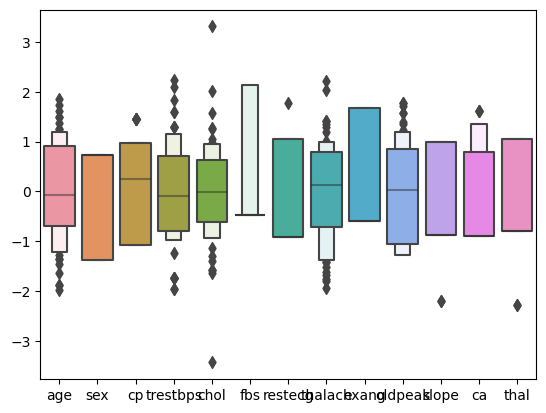

In [80]:
sns.boxenplot(x_test)

#### 5.Featutre_Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_data,columns=x_train.columns)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.221455,0.670151,-1.010468,0.330580,0.279411,-0.404304,-1.046975,-0.999784,-0.722504,1.346564,-0.738802,1.039969,1.197795
1,-1.637509,-1.492202,1.075455,-2.618155,-0.942679,-0.404304,0.899645,1.475376,-0.722504,-1.153690,1.036430,-0.835365,-0.514306
2,0.604233,0.670151,-1.010468,-0.802956,-0.221174,2.473388,0.899645,0.420928,1.384075,0.740414,1.036430,1.282366,1.197795
3,1.221455,-1.492202,1.075455,1.625160,2.077658,-0.404304,-1.046975,-0.016505,-0.722504,0.252552,1.036430,-0.835365,-0.514306
4,-0.316064,0.670151,1.075455,2.158882,-0.942679,2.473388,0.899645,0.523565,-0.722504,-0.116797,1.036430,-0.835365,1.197795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.018492,-1.492202,0.464226,0.155131,1.809253,-0.404304,0.899645,0.734738,-0.722504,0.603282,1.036430,-0.835365,-0.514306
238,1.348371,-1.492202,-1.010468,2.408318,-0.264993,2.473388,0.899645,0.681208,1.384075,0.443112,-0.738802,1.282366,1.197795
239,-1.542696,0.670151,1.437578,0.612459,-0.942679,-0.404304,0.899645,1.415447,1.384075,0.740414,1.036430,-0.835365,1.197795
240,0.725285,0.670151,-1.010468,0.501241,-1.831564,-0.404304,-1.046975,-1.071028,1.384075,1.550906,-0.738802,1.039969,-0.514306


<Axes: ylabel='count'>

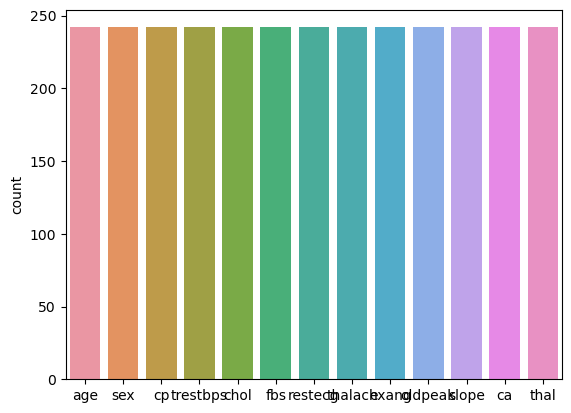

In [83]:
sns.countplot(x_train)

In [85]:
scaler = StandardScaler()
scaled_data = scalar.fit_transform(x_test)
x_test = pd.DataFrame(scaled_data,columns = x_test.columns)
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.287358,0.724569,0.254338,-0.801265,1.244510,-0.469042,1.055535,0.850697,-0.596285,-0.848620,0.988657,-0.900131,-0.800977
1,0.240610,0.724569,0.971193,0.925971,-3.429730,2.132007,1.055535,0.905391,-0.596285,-0.848620,0.988657,0.797572,1.048928
2,-0.887328,0.724569,-1.065357,0.476458,1.060987,-0.469042,1.055535,-1.417203,1.677051,0.850462,-0.871091,1.344901,1.048928
3,-0.079152,-1.380131,0.971193,1.290732,-0.926214,-0.469042,1.055535,0.377929,-0.596285,-1.279870,0.988657,0.797572,-0.800977
4,-1.078835,0.724569,0.971193,0.476458,-0.178309,-0.469042,-0.917369,1.300514,-0.596285,-1.279870,0.988657,-0.900131,-0.800977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.251536,0.724569,-1.065357,-0.801265,0.936948,-0.469042,-0.917369,-0.198818,-0.596285,-0.503515,-0.871091,-0.900131,-0.800977
57,-1.884858,-1.380131,-1.065357,0.374106,-1.395927,-0.469042,1.055535,1.417378,-0.596285,0.575282,0.988657,-0.900131,-0.800977
58,0.349150,0.724569,-1.065357,-0.421198,0.908698,-0.469042,-0.917369,0.796439,-0.596285,-1.279870,0.988657,1.344901,1.048928
59,-1.265954,0.724569,1.456629,0.843606,-0.004678,-0.469042,-0.917369,1.185421,-0.596285,0.023155,0.988657,1.344901,-0.800977


<Axes: ylabel='count'>

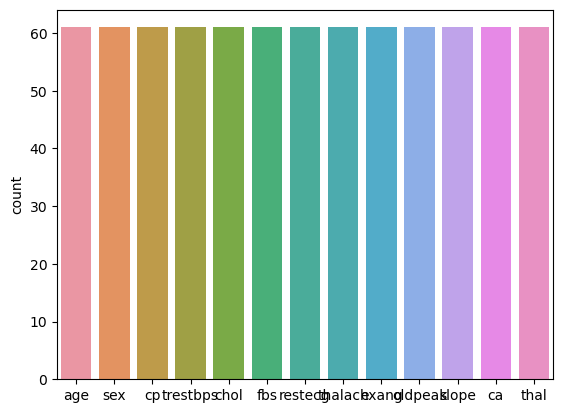

In [86]:
sns.countplot(x_test)

#### 6.Feature_Selection

#### 6.1.Correlation

<Axes: >

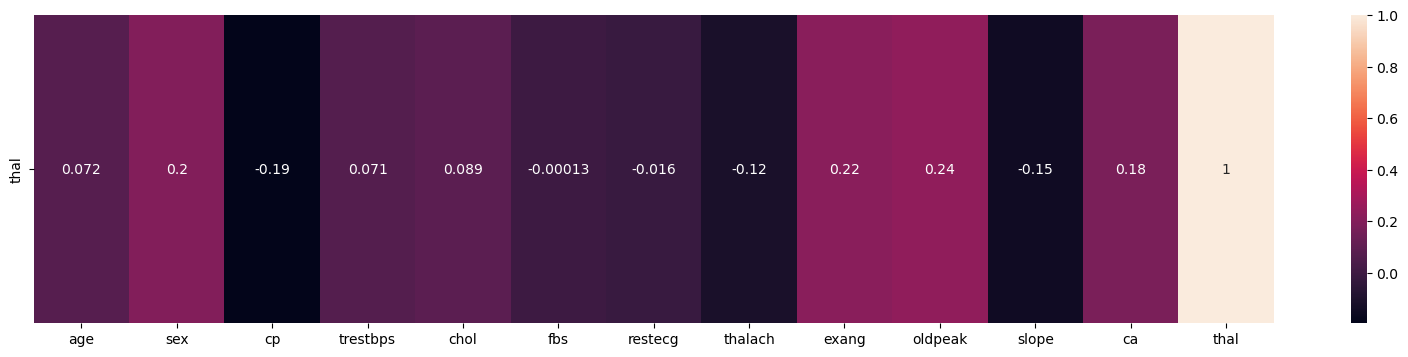

In [87]:
plt.figure(figsize=(20,4))
sns.heatmap(x_train.corr().tail(1),annot=True)

<Axes: >

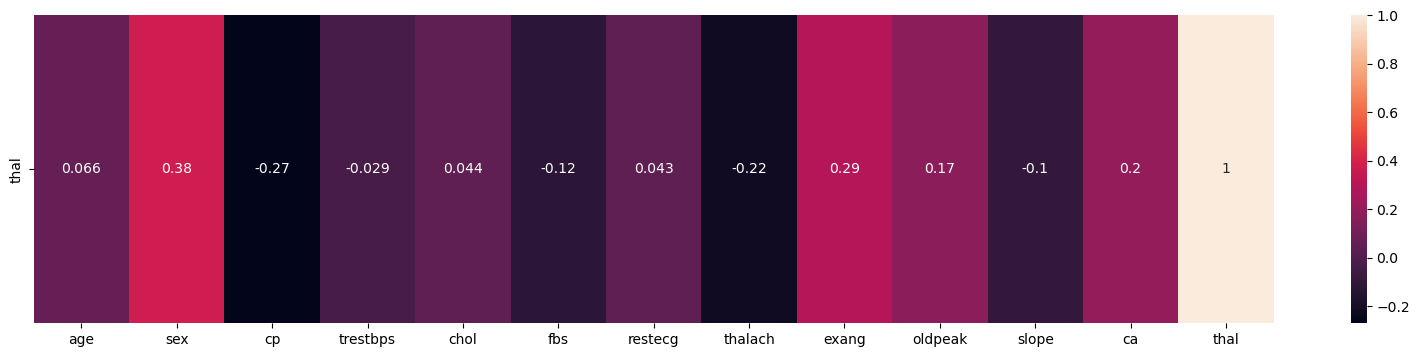

In [88]:
plt.figure(figsize=(20,4))
sns.heatmap(x_test.corr().tail(1),annot=True)

#### 6.2.Fisher_Score

In [91]:
from skfeature.function.similarity_based import fisher_score

In [96]:
rank_train = fisher_score.fisher_score(x_train.to_numpy(),y_train.to_numpy(),mode = "rank")
rank_train

array([ 1, 10,  5,  3,  4,  0,  2, 11, 12,  6,  9,  8,  7])

<Axes: >

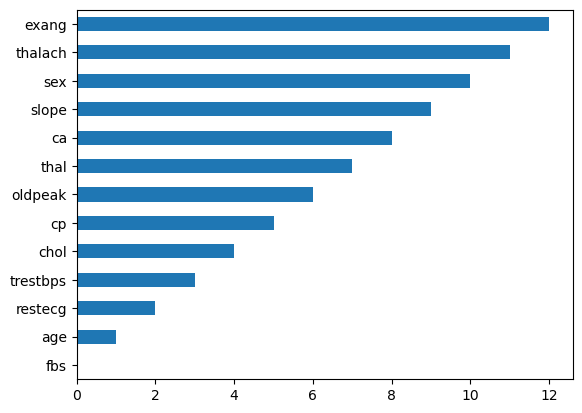

In [97]:
s_train = pd.Series(rank_train,index = x_train.columns)
s_train.sort_values().plot(kind = "barh")

In [98]:
rank_test = fisher_score.fisher_score(x_test.to_numpy(),y_test.to_numpy(),mode="rank")
rank_test

array([ 4, 10,  2,  0,  3,  1,  5, 11,  8,  6,  7,  9, 12])

<Axes: >

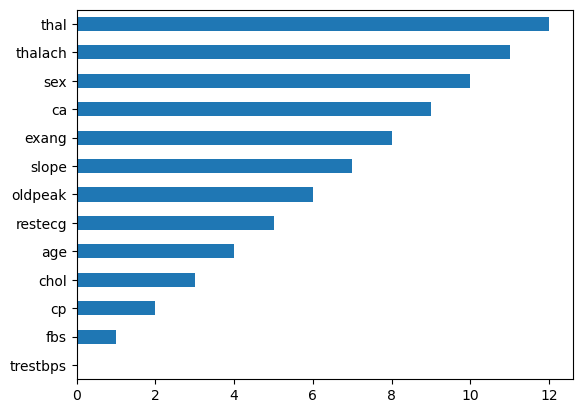

In [99]:
s_test = pd.Series(rank_test,index = x_test.columns)
s_test.sort_values().plot(kind = "barh")

#### 6.3.Variancethreshold

In [100]:
from sklearn.feature_selection import VarianceThreshold

In [101]:
var_th = VarianceThreshold()
var_th.fit_transform(x_train)
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [102]:
var_th = VarianceThreshold()
var_th.fit_transform(x_test)
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

#### 6.4.VIF

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Axes: >

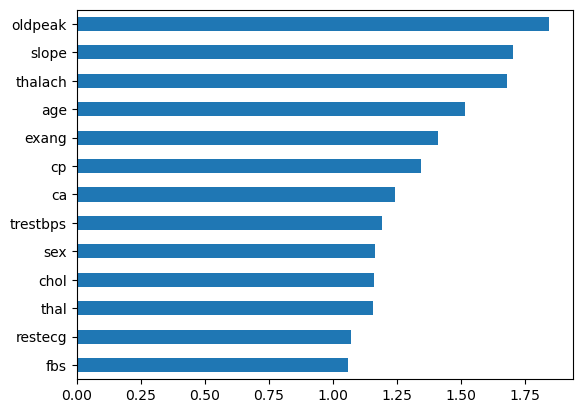

In [104]:
vif_list = [variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif_list
s1_x_train = pd.Series(vif_list,index = x_train.columns)
s1_x_train.sort_values().plot(kind = "barh")

<Axes: >

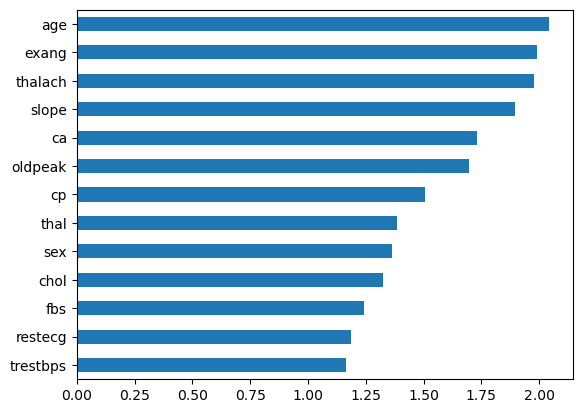

In [105]:
vif_list = [variance_inflation_factor(x_test.values,i)for i in range(x_test.shape[1])]
vif_list
s1_x_test = pd.Series(vif_list,index = x_test.columns)
s1_x_test.sort_values().plot(kind = "barh")

#### 7.Model_Training

#### 7.1.Logistic_Classification

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [110]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [111]:
log_clf.score(x_train,y_train)

0.8801652892561983

In [112]:
log_clf.score(x_test,y_test)

0.8524590163934426

#### 7.2.KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [120]:
knn_clf.score(x_train,y_train)

0.8884297520661157

In [121]:
knn_clf.score(x_test,y_test)

0.8524590163934426

#### 7.3.Decision_Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [123]:
dt_clf.score(x_train,y_train)

1.0

In [124]:
dt_clf.score(x_test,y_test)

0.7704918032786885

#### 7.4.Random_Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [127]:
rf_clf.score(x_train,y_train)

1.0

In [128]:
rf_clf.score(x_test,y_test)

0.8360655737704918

#### 7.5.Adaboost

In [129]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
ad_clf = AdaBoostClassifier()
ad_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [131]:
ad_clf.score(x_train,y_train)

0.9421487603305785

In [132]:
ad_clf.score(x_test,y_test)

0.7868852459016393

#### Using LazyPredict

In [133]:
from lazypredict.Supervised import LazyClassifier

In [137]:
clf = LazyClassifier(verbose=0,
    ignore_warnings=True,
    custom_metric=None)
models = clf.fit(x_train,x_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.72it/s]

[LightGBM] [Info] Number of positive: 132, number of negative: 110
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [138]:
models

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 RidgeClassifier                    0.89               0.88     0.88      0.88   
 LinearDiscriminantAnalysis         0.89               0.88     0.88      0.88   
 RidgeClassifierCV                  0.87               0.86     0.86      0.87   
 LinearSVC                          0.85               0.85     0.85      0.85   
 CalibratedClassifierCV             0.85               0.85     0.85      0.85   
 LogisticRegression                 0.85               0.85     0.85      0.85   
 KNeighborsClassifier               0.85               0.84     0.84      0.85   
 LGBMClassifier                     0.84               0.83     0.83      0.84   
 ExtraTreesClassifier               0.84               0.83     0.83      0.84   
 SVC                                0.84               0.83     0.83      0.84   
 NuSVC          

#### 8.Comparing_Models

In [139]:
dict1 = {"Train_Accuracy":[0.88,0.88,1,1,0.94],
        "Test_Accuracy":[0.85,0.85,0.77,0.83,0.73]}
acc_df = pd.DataFrame(dict1,index = ['log_clf',"knn_clf","dt_clf","rf_clf","ad_clf"])
acc_df

,Train_Accuracy,Test_Accuracy
log_clf,0.88,0.85
knn_clf,0.88,0.85
dt_clf,1.00,0.77
rf_clf,1.00,0.83
ad_clf,0.94,0.73


#### 8.1.Logistic_Regession

In [141]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

#### Test_Data_Evaluation

In [156]:
y_pred_test = log_clf.predict(x_test)

accuracy = accuracy_score(y_pred_test,y_test)
print("Accuracy :",accuracy)
print("*****************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("Confusion_Matrix :\n",cnf_matrix)
print("*****************************")

clf_report = classification_report(y_pred_test,y_test)
print("Classification_Report :\n",clf_report)

Accuracy : 0.8524590163934426
*****************************
Confusion_Matrix :
 [[23  4]
 [ 5 29]]
*****************************
Classification_Report :
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [157]:
pred_dict = {"Actual_Value":y_test,"Predicted_Value":y_pred_test}
test_pred_df = pd.DataFrame(pred_dict)
test_pred_df.head(10)

,Actual_Value,Predicted_Value
45,1,1
111,1,1
285,0,0
130,1,1
46,1,1
283,0,1
135,1,1
263,0,0
171,0,1
240,0,0


#### Train_Data_Evaluation

In [145]:
y_pred_train = log_clf.predict(x_train)

accuracy = accuracy_score(y_pred_train,y_train)
print("Accuracy :",accuracy)
print("*****************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("Confusion_Matrix :\n",cnf_matrix)
print("*****************************")

clf_report = classification_report(y_pred_train,y_train)
print("Classification_Report :\n",clf_report)

Accuracy : 0.8801652892561983
*****************************
Confusion_Matrix :
 [[ 92  11]
 [ 18 121]]
*****************************
Classification_Report :
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.92      0.87      0.89       139

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



In [158]:
pred_dict = {"Actual_Value":y_train,"Predicted_Value":y_pred_train}
train_pred_df = pd.DataFrame(pred_dict)
train_pred_df.head(10)

,Actual_Value,Predicted_Value
218,0,0
124,1,1
176,0,0
39,1,1
8,1,1
66,1,1
179,0,0
203,0,0
301,0,0
143,1,1


#### 8.2.KNN_Classification

In [162]:
knn_clf = KNeighborsClassifier(n_neighbors=5,p=1)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(p=1)

#### Test_Data_Evaluation

In [163]:
y_pred_test = knn_clf.predict(x_test)

accuracy = accuracy_score(y_pred_test,y_test)
print("Accuracy :",accuracy)
print("*****************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("Confusion_Matrix :\n",cnf_matrix)
print("*****************************")

clf_report = classification_report(y_pred_test,y_test)
print("Classification_Report :\n",clf_report)

Accuracy : 0.8688524590163934
*****************************
Confusion_Matrix :
 [[22  2]
 [ 6 31]]
*****************************
Classification_Report :
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.94      0.84      0.89        37

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.87        61
weighted avg       0.88      0.87      0.87        61



In [164]:
pred_dict = {"Actual_Value":y_test,"Predicted_Value":y_pred_test}
test_pred_df = pd.DataFrame(pred_dict)
test_pred_df.head(10)

,Actual_Value,Predicted_Value
45,1,1
111,1,1
285,0,0
130,1,1
46,1,1
283,0,1
135,1,1
263,0,0
171,0,0
240,0,0


#### Train_Data_Evaluation

In [166]:
y_pred_train = log_clf.predict(x_train)

accuracy = accuracy_score(y_pred_train,y_train)
print("Accuracy :",accuracy)
print("*****************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("Confusion_Matrix :\n",cnf_matrix)
print("*****************************")

clf_report = classification_report(y_pred_train,y_train)
print("Classification_Report :\n",clf_report)

Accuracy : 0.8801652892561983
*****************************
Confusion_Matrix :
 [[ 92  11]
 [ 18 121]]
*****************************
Classification_Report :
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.92      0.87      0.89       139

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



In [167]:
pred_dict = {"Actual_Value":y_train,"Predicted_Value":y_pred_train}
train_pred_df = pd.DataFrame(pred_dict)
train_pred_df.head(10)

,Actual_Value,Predicted_Value
218,0,0
124,1,1
176,0,0
39,1,1
8,1,1
66,1,1
179,0,0
203,0,0
301,0,0
143,1,1


#### p =1 ie manhattan distance

Text(0, 0.5, 'Accuracies')

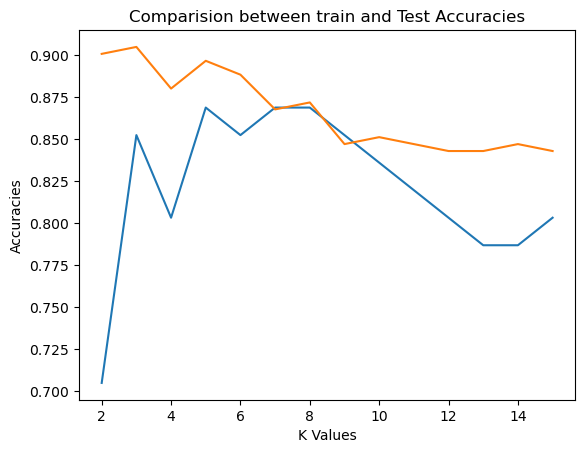

In [168]:
k_values = np.arange(2,16)
test_acc_list = []
train_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn_clf.fit(x_train, y_train)
    train_acc = knn_clf.score(x_train, y_train)
    train_acc_list.append(train_acc)
    
    test_acc = knn_clf.score(x_test, y_test)
    test_acc_list.append(test_acc)
    # print(k, train_acc, test_acc)
    
plt.plot(k_values, test_acc_list)
plt.plot(k_values, train_acc_list)
plt.title("Comparision between train and Test Accuracies")
plt.xlabel("K Values")
plt.ylabel("Accuracies")

In [171]:
knn_clf = KNeighborsClassifier(n_neighbors=7,p=1)
knn_clf.fit(x_train,y_train)
print("Train_Accuracy :",knn_clf.score(x_train,y_train))
print("Test_Accuracy :",knn_clf.score(x_test,y_test))

Train_Accuracy : 0.8677685950413223
Test_Accuracy : 0.8688524590163934


#### p =1 ie euclidean distance

Text(0, 0.5, 'Accuracies')

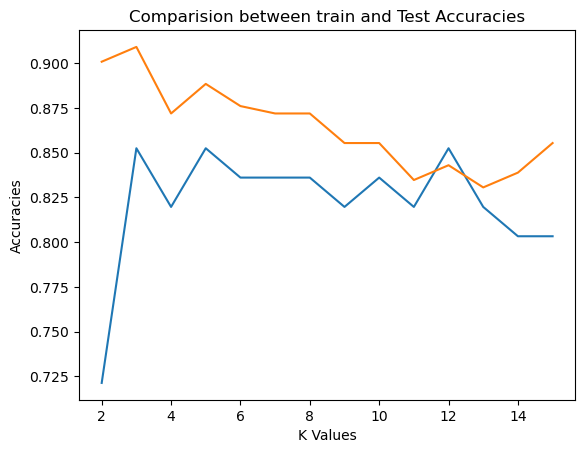

In [169]:
k_values = np.arange(2,16)
test_acc_list = []
train_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn_clf.fit(x_train, y_train)
    train_acc = knn_clf.score(x_train, y_train)
    train_acc_list.append(train_acc)
    
    test_acc = knn_clf.score(x_test, y_test)
    test_acc_list.append(test_acc)
    # print(k, train_acc, test_acc)
    
plt.plot(k_values, test_acc_list)
plt.plot(k_values, train_acc_list)
plt.title("Comparision between train and Test Accuracies")
plt.xlabel("K Values")
plt.ylabel("Accuracies")

In [178]:
knn_clf = KNeighborsClassifier(n_neighbors=12,p=2)
knn_clf.fit(x_train,y_train)
print("Train_Accuracy :",knn_clf.score(x_train,y_train))
print("Test_Accuracy :",knn_clf.score(x_test,y_test))

Train_Accuracy : 0.8429752066115702
Test_Accuracy : 0.8524590163934426


#### Hyperparameter_TUnning

In [179]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#### 1.GridSearchCV

In [182]:
knn_clf = KNeighborsClassifier()
hyp_grid = {"n_neighbors":np.arange(3,30),
           "p":[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyp_grid,cv = 5)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [183]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [184]:
gscv_knn_clf.best_params_

{'n_neighbors': 20, 'p': 2}

In [185]:
knn_clf = KNeighborsClassifier(n_neighbors=20,p =2)
knn_clf.fit(x_train,y_train)
print("Train_Accuracy :",knn_clf.score(x_train,y_train))
print("Test_Accuracy :",knn_clf.score(x_test,y_test))

Train_Accuracy : 0.8429752066115702
Test_Accuracy : 0.8032786885245902


#### 2.RandomizedSearchCV

In [211]:
knn_clf = KNeighborsClassifier()
hyp_grid = {"n_neighbors":np.arange(3,30),
           "p":[1,2]}
rscv_knn_clf = RandomizedSearchCV(knn_clf,hyp_grid,cv = 5)
rscv_knn_clf.fit(x_train,y_train)
rscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=27, p=1)

In [212]:
rscv_knn_clf.best_params_

{'p': 1, 'n_neighbors': 27}

In [213]:
knn_clf = KNeighborsClassifier(n_neighbors=12,p =1)
knn_clf.fit(x_train,y_train)
print("Train_Accuracy :",knn_clf.score(x_train,y_train))
print("Test_Accuracy :",knn_clf.score(x_test,y_test))

Train_Accuracy : 0.8429752066115702
Test_Accuracy : 0.8032786885245902


In [214]:
pred_dict = {"Actual_Value":y_test,"Predicted_Value":y_pred_test}
test_pred_df = pd.DataFrame(pred_dict)
test_pred_df.head(10)

,Actual_Value,Predicted_Value
45,1,1
111,1,1
285,0,0
130,1,1
46,1,1
283,0,1
135,1,1
263,0,0
171,0,1
240,0,0


In [215]:
pred_dict = {"Actual_Value":y_train,"Predicted_Value":y_pred_train}
train_pred_df = pd.DataFrame(pred_dict)
train_pred_df.head(10)

,Actual_Value,Predicted_Value
218,0,0
124,1,1
176,0,0
39,1,1
8,1,1
66,1,1
179,0,0
203,0,0
301,0,0
143,1,1


#### Saving_Model

In [216]:
import pickle

In [217]:
with open("knn_classifier.pkl","wb") as f:
    pickle.dump(knn_clf,f)